In [115]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn.decomposition import PCA
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [116]:
GORSSEL = "genscen_Gorssel_50000_07-06-2021-05-33-45.tar.gz"
GORSSEL = "genscen_Gorssel_5000_07-06-2021-21-48-35.tar.gz"
GORSSEL = "genscen_Gorssel_50_07-06-2021-21-58-23.tar.gz"
GORSSEL = "genscen_Gorssel_50_07-06-2021-23-17-44.tar.gz"

In [117]:
experiments, outcomes = load_results("data/generated/" + GORSSEL)
dike_model, planning_steps = get_model_for_problem_formulation("Gorssel")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]
x = experiments[uncertainties]
outcomes_df = pd.DataFrame(outcomes)

In [118]:
outcomes_df.columns.values.tolist()

['Difference in Expected Annual Damage Deventer-Gorssel',
 'Difference in Expected Number of Deaths Deventer-Gorssel',
 'Expected Annual Damage Gorssel']

In [121]:
DIFDAMAGE = outcomes_df.columns[0]
DAMAGE = outcomes_df.columns[2]
DIFDEATHS = outcomes_df.columns[1]

In [123]:
outcomes_df.loc[outcomes_df[DIFDEATHS] < 0]

,Difference in Expected Annual Damage Deventer-Gorssel,Difference in Expected Number of Deaths Deventer-Gorssel,Expected Annual Damage Gorssel
0,-9.031755e+07,-0.034584,0.000000
1,-1.204911e+08,-0.066441,0.015604
2,-6.287472e+07,-0.023048,0.000000
3,-3.835828e+06,-0.002049,0.000000
4,-4.062974e+07,-0.032487,0.030692
5,-5.086240e+07,-0.041311,0.024069
6,-4.381242e+07,-0.022575,0.000000
7,-1.624046e+08,-0.070753,0.000000
8,-2.051114e+08,-0.190970,0.184326
9,-2.455655e+07,-0.019503,0.019503


In [124]:
outcomes_df.describe(percentiles=np.arange(0, 1, 0.1))

,Difference in Expected Annual Damage Deventer-Gorssel,Difference in Expected Number of Deaths Deventer-Gorssel,Expected Annual Damage Gorssel
count,5.000000e+01,50.000000,50.000000
mean,-2.114838e+08,-0.172957,0.150533
std,2.500114e+08,0.232135,0.235734
min,-1.080781e+09,-1.118022,0.000000
0%,-1.080781e+09,-1.118022,0.000000
10%,-5.301349e+08,-0.466133,0.000000
20%,-2.973992e+08,-0.231345,0.000000
30%,-1.959884e+08,-0.153707,0.004946
40%,-1.626413e+08,-0.132429,0.022243
50%,-1.317937e+08,-0.070458,0.044174


In [125]:
# LEGACY
# def conditional(y):
#     '''
#     Define the conditionals for each outcome
#     '''
#     # Difference in Expected Annual Damage Gorssel-Deventer
#     # We do not accept any difference
#     if y == DIFDAMAGE:
#         return outcomes_df[y] > np.percentile(a=outcomes[DIFDAMAGE], q=80)
#     # Expected Annual Damage Gorssel
#     #
#     elif y == DAMAGE:
#         return outcomes_df[y] > np.percentile(a=outcomes[DAMAGE], q=80)
#     # Difference in Expected Number of Deaths Gorssel-Deventer
#     # We do not accept any difference
#     elif y == DIFDEATHS:
#         return outcomes_df[y] > np.percentile(a=outcomes[DIFDEATHS], q=80)
#     else:
#         exit()

In [126]:
prim_algs = {}
for outcome in outcomes_df.columns:
    #code block below performs a rotation of data
#     x_numeric = x.select_dtypes(exclude=pd.CategoricalDtype)
#     x_categorical = x.select_dtypes(include=pd.CategoricalDtype)
#     rotated_experiments, rotation_matrix = prim.pca_preprocess(x_numeric, conditional(outcome))
#     rotated_x = pd.concat([rotated_experiments, x_categorical], axis=1)
#     rotated_x.columns = x_numeric.columns.tolist() + x_categorical.columns.tolist()
#     x = rotated_x
    
    prim_algs[outcome] = prim.Prim(x, outcomes_df[outcome] > np.percentile(a=outcomes[outcome], q=90), threshold=0.8)

In [127]:
boxes = {}
for key in outcomes_df.columns:
    print(key)
    boxes[key] = prim_algs[key].find_box()

Difference in Expected Annual Damage Deventer-Gorssel
Difference in Expected Number of Deaths Deventer-Gorssel
Expected Annual Damage Gorssel


Difference in Expected Annual Damage Deventer-Gorssel


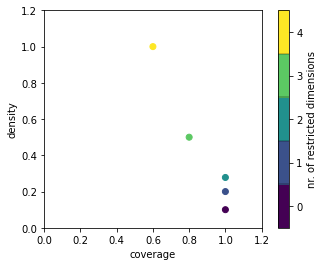

Difference in Expected Number of Deaths Deventer-Gorssel


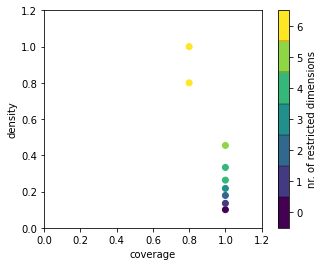

Expected Annual Damage Gorssel


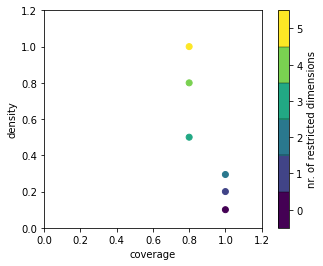

In [128]:
for key, box in boxes.items():
    print(key)
    box.show_tradeoff()
    plt.show()

# Trying around to find the right box

In [11]:
box_id=51
BOX = DIFDEATHS

coverage       0.714
density     0.979155
id                51
mass         0.07292
mean        0.979155
res_dim            3
Name: 51, dtype: object

             box 51                                         
                min       max                      qp values
A.5_pfail  0.000006  0.089581                    [-1.0, 0.0]
A.4_pfail  0.145402  0.999985  [5.642639348135097e-78, -1.0]
A.3_pfail  0.047264  0.999984   [0.005624042684444242, -1.0]



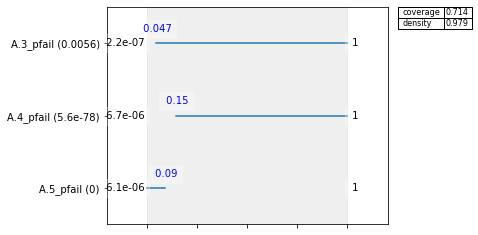

In [12]:
boxes[BOX].inspect(box_id)
boxes[BOX].inspect(box_id, style='graph')
plt.show()

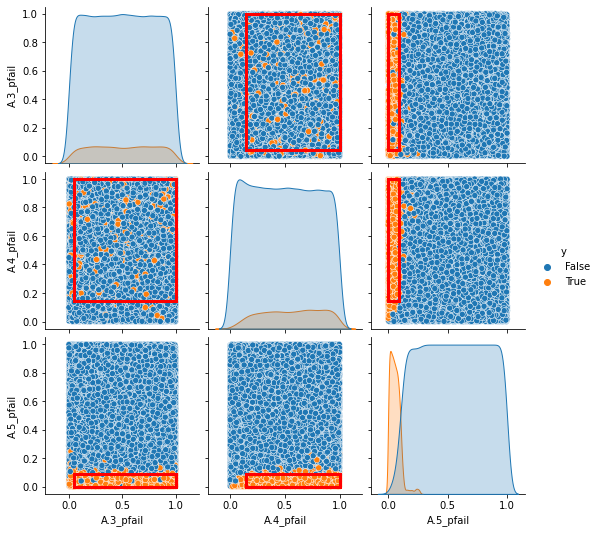

In [13]:
boxes[BOX].select(box_id)
boxes[BOX].show_pairs_scatter()
plt.show()

In [14]:
lims = boxes[BOX].box_lims[box_id]

Select an actual scenario

In [15]:
conditions = []

for column in lims.columns:
    if isinstance(lims[column][0], set):
        conditions.append(experiments[column].isin(lims[column][0]))
    else:
        conditions.append(experiments[column] >= lims[column][0])
        conditions.append(experiments[column] <= lims[column][1])

df = pd.DataFrame(conditions).T

In [16]:
filtered_experiments = experiments.iloc[df[(df== False).any(axis=1)].index]

In [17]:
filtered_experiments

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,A.0_ID flood wave shape,...,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Policy 0,dikesnet
1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Policy 0,dikesnet
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Policy 0,dikesnet
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Policy 0,dikesnet
4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,Policy 0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49994,Policy 0,dikesnet
49995,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,56.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49995,Policy 0,dikesnet
49997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,28.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49997,Policy 0,dikesnet
49998,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49998,Policy 0,dikesnet


In [18]:
filtered_experiments.sample(n=1, random_state=1)

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,A.0_ID flood wave shape,...,EWS_DaysToThreat,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
22116,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22116,Policy 0,dikesnet


In [22]:
results = pd.concat([experiments, outcomes_df], axis=1)

In [42]:
damage_df = results.loc[results[DAMAGE] > np.percentile(a=outcomes[DAMAGE], q=90)]
difdamage_df = results.loc[results[DIFDAMAGE] > np.percentile(a=outcomes[DIFDAMAGE], q=90)]
difdeaths_df = results.loc[results[DIFDEATHS] > np.percentile(a=outcomes[DIFDEATHS], q=90)]
len(set(damage_df["scenario"].tolist()) & set(difdamage_df["scenario"].tolist()) & set(difdeaths_df["scenario"].tolist()))

4384

So apparently of the worst 10 percentile of every objective, 4384/5000 are scenarios within all the worst 10 percentiles.

Best case

In [52]:
damage_df = results.loc[results[DAMAGE] <= np.percentile(a=outcomes[DAMAGE], q=0.1)]
difdamage_df = results.loc[results[DIFDAMAGE] <= np.percentile(a=outcomes[DIFDAMAGE], q=0.1)]
difdeaths_df = results.loc[results[DIFDEATHS] <= np.percentile(a=outcomes[DIFDEATHS], q=0.1)]
len(set(damage_df["scenario"].tolist()) & set(difdamage_df["scenario"].tolist()) & set(difdeaths_df["scenario"].tolist()))

134

Mediocre case

In [68]:
difdeaths_df = results.loc[(np.percentile(a=outcomes[DAMAGE], q=45) < results[DAMAGE]) & (results[DAMAGE] <= np.percentile(a=outcomes[DAMAGE], q=55))]
difdeaths_df = results.loc[(np.percentile(a=outcomes[DIFDAMAGE], q=45) < results[DIFDAMAGE]) & (results[DIFDAMAGE] <= np.percentile(a=outcomes[DIFDAMAGE], q=55))]
difdeaths_df = results.loc[(np.percentile(a=outcomes[DIFDEATHS], q=45) < results[DIFDEATHS]) & (results[DIFDEATHS] <= np.percentile(a=outcomes[DIFDEATHS], q=55))]
len(set(damage_df["scenario"].tolist()) & set(difdamage_df["scenario"].tolist()) & set(difdeaths_df["scenario"].tolist()))

0

In [65]:
difdeaths_df

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,A.0_ID flood wave shape,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model,Difference in Expected Annual Damage Gorssel-Deventer,Expected Annual Damage Gorssel,Difference in Expected Number of Deaths Gorssel-Deventer
34,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,55.0,...,0.0,0.0,0.0,0.0,34,Policy 0,dikesnet,1.768572e+08,0.006345,0.074548
84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,...,0.0,0.0,0.0,0.0,84,Policy 0,dikesnet,1.735276e+08,0.004854,0.078879
134,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,...,0.0,0.0,0.0,0.0,134,Policy 0,dikesnet,1.917705e+08,0.008467,0.073729
186,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,37.0,...,0.0,0.0,0.0,0.0,186,Policy 0,dikesnet,1.482646e+08,0.000000,0.074692
220,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,81.0,...,0.0,0.0,0.0,0.0,220,Policy 0,dikesnet,1.505214e+08,0.000000,0.078587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49799,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,98.0,...,0.0,0.0,0.0,0.0,49799,Policy 0,dikesnet,2.062657e+08,0.000000,0.075187
49809,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,99.0,...,0.0,0.0,0.0,0.0,49809,Policy 0,dikesnet,1.561294e+08,0.000000,0.074177
49814,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,16.0,...,0.0,0.0,0.0,0.0,49814,Policy 0,dikesnet,2.067245e+08,0.000000,0.075426
49821,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,70.0,...,0.0,0.0,0.0,0.0,49821,Policy 0,dikesnet,1.435859e+08,0.000000,0.074006


In [ ]:
difdamagerec = results.loc[results[DAMAGE] >= np.percentile(a=outcomes[DAMAGE], q=90)].sample(n=1, random_state=1)